# COMP 2200 Group Project

### Group 35
- 45962766 : Mikhael Tsie
- 45531536 : Hemanth Kumar Vejandla
- 45549192 : Nipun Shrestha
- 45707650 : Zhi Jie Chair

# Project Summary

The main theme of the proposal started with our group intrest in U.S Presedential Elections ahed. Since Australian Politics effect our daily lives and as who is voted into the government can have a huge effect on our future, we decided to work on the election of the Australian Government

The aim of this project is to classify and cluster similar federal divisions based on the socioeconomic factors based off the Australian Bureau statistics data set in the year 2016 and predict the results of the 2019 federal election.

For the first part of the project we used multiple different analytical algoithms and evaluated those models in which uses all the features provided from the dataset, then we used a wide range of accuracy tests to evaluate the performance of the models. For the second half we used RFE (Recursive Feature Elimination) to further improve the performance of our models.

After the socio-economic data were processed using different clustering algorithms, we use Geopandas library to visualise the predictions that our models made.

# Our Data 

Our data was collected from the Australian Bureau of Stastics(ABS) through the responsive maps of ABS. As we could not find a complete data set for all the socio-economic factors that we wanted to research on, we had to make a independent dataset by going through all the federal divisions manually and collecting the data we required.

# Importing Libraries

In [94]:
import geopandas
import descartes
import seaborn as sns
from descartes import PolygonPatch
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE


In [95]:
#importing the australia map with federal boudaries 
aus = geopandas.read_file('Map2016/COM_ELB.TAB')
aus = aus.drop(columns=['State','Total_Population'])
aus.columns

Index(['Elect_div', 'Numccds', 'Actual', 'Projected', 'Australians_Over_18',
       'Area_SqKm', 'Sortname', 'geometry'],
      dtype='object')

In [96]:
#Renaming the columns 
df = pd.read_csv("EconimicFactors.csv")
df.head()


,Divisions,State,Male Pop,Female Pop,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,Median Age,Preschool,Primary - Government,Primay - Catholic,Primary - Other,Secondary - Government,Secondary - Catholic,Secondary - Other,Technical Or further,University Or tertiary,Other,Not Stated Education,Bachelor Degree,Advanced Diploma And Diploma level,CertIV,CertIII,Year 12,Year 11,Year 10,CertII,CertI,Year 9 Or Under,None,Not Stated Highest Educational Attainment,Worked Full Time,Worked Part Time,Away From Work,Unemployed,Professionals,Clerical And Administrative Workers,Technicians And Trade Workers,Managers,Community And Personal Service Workers,Sales Workers,Labourers,Machinery Operators And Drivers,Personal Median Weekly Incomes,Family Weekly Median Weekly Incomes,Household Median Weekly Incomes,Owned Private Dwelling Outright,Owned Private Dwelling With A Mortgage,Rented Private Dwelling,Other Tenure Type,Tenure Type Not Stated
0,Adelaide,SA,0.496,0.504,0.051,0.050,0.046,0.057,0.095,0.092,0.084,0.069,0.063,0.063,0.061,0.060,0.055,0.049,0.033,0.025,0.020,0.026,36,0.035,0.121,0.050,0.041,0.050,0.037,0.053,0.063,0.326,0.026,0.195,0.343,0.085,0.022,0.076,0.178,0.056,0.055,0.000,0.0,0.062,0.013,0.086,0.550,0.325,0.044,0.081,0.332,0.127,0.092,0.136,0.107,0.085,0.074,0.031,676,1918,1394,0.281,0.282,0.400,0.013,0.025
1,Aston,VIC,0.488,0.512,0.058,0.059,0.059,0.066,0.068,0.064,0.068,0.067,0.067,0.072,0.072,0.069,0.061,0.052,0.036,0.027,0.018,0.019,39,0.056,0.204,0.046,0.026,0.150,0.059,0.039,0.067,0.169,0.031,0.152,0.229,0.102,0.032,0.129,0.173,0.072,0.083,0.000,0.0,0.077,0.006,0.070,0.585,0.315,0.043,0.056,0.211,0.158,0.148,0.121,0.100,0.111,0.081,0.054,665,1830,1590,0.341,0.423,0.199,0.015,0.022
2,Ballarat,VIC,0.485,0.515,0.062,0.067,0.062,0.064,0.065,0.059,0.059,0.059,0.064,0.067,0.068,0.066,0.062,0.059,0.043,0.030,0.021,0.022,40,0.055,0.182,0.070,0.032,0.099,0.069,0.046,0.045,0.140,0.024,0.239,0.179,0.088,0.037,0.148,0.134,0.077,0.102,0.001,0.0,0.101,0.002,0.109,0.537,0.342,0.056,0.065,0.200,0.127,0.152,0.118,0.121,0.099,0.103,0.062,593,1507,1191,0.337,0.363,0.265,0.007,0.028
3,Banks,NSW,0.486,0.514,0.061,0.059,0.056,0.061,0.069,0.074,0.074,0.066,0.067,0.065,0.068,0.065,0.055,0.046,0.035,0.029,0.024,0.027,38,0.055,0.179,0.057,0.020,0.134,0.058,0.027,0.061,0.209,0.031,0.168,0.258,0.097,0.023,0.100,0.190,0.030,0.100,0.000,0.0,0.081,0.012,0.074,0.594,0.298,0.046,0.062,0.235,0.168,0.126,0.119,0.099,0.096,0.080,0.058,644,1837,1598,0.336,0.319,0.313,0.007,0.025
4,Barker,SA,0.505,0.495,0.055,0.062,0.062,0.059,0.051,0.052,0.054,0.054,0.061,0.069,0.071,0.072,0.070,0.067,0.050,0.037,0.025,0.027,44,0.041,0.245,0.045,0.044,0.162,0.019,0.024,0.056,0.047,0.019,0.298,0.088,0.066,0.030,0.157,0.126,0.117,0.134,0.001,0.0,0.127,0.006,0.122,0.556,0.329,0.058,0.058,0.117,0.102,0.132,0.173,0.102,0.093,0.185,0.080,570,1334,1050,0.358,0.324,0.273,0.016,0.028


# Data Preparation 

In [97]:
df.describe()

,Male Pop,Female Pop,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,Median Age,Preschool,Primary - Government,Primay - Catholic,Primary - Other,Secondary - Government,Secondary - Catholic,Secondary - Other,Technical Or further,University Or tertiary,Other,Not Stated Education,Bachelor Degree,Advanced Diploma And Diploma level,CertIV,CertIII,Year 12,Year 11,Year 10,CertII,CertI,Year 9 Or Under,None,Not Stated Highest Educational Attainment,Worked Full Time,Worked Part Time,Away From Work,Unemployed,Professionals,Clerical And Administrative Workers,Technicians And Trade Workers,Managers,Community And Personal Service Workers,Sales Workers,Labourers,Machinery Operators And Drivers,Personal Median Weekly Incomes,Family Weekly Median Weekly Incomes,Household Median Weekly Incomes,Owned Private Dwelling Outright,Owned Private Dwelling With A Mortgage,Rented Private Dwelling,Other Tenure Type,Tenure Type Not Stated
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.492995,0.507673,0.062207,0.064249,0.059980,0.060760,0.066060,0.069827,0.071536,0.066093,0.067500,0.067787,0.065500,0.062727,0.056173,0.051520,0.038580,0.028360,0.020047,0.022507,38.360000,0.048367,0.185573,0.053073,0.032493,0.116800,0.049293,0.039460,0.058947,0.154393,0.026593,0.235594,0.215480,0.088560,0.03258,0.130300,0.155647,0.049953,0.110213,0.000653,0.000007,0.081320,0.007407,0.103587,0.573982,0.30726,0.050148,0.072373,0.215907,0.134893,0.137687,0.129400,0.109240,0.094320,0.097293,0.064767,677.873333,1776.966667,1482.613333,0.311847,0.346620,0.304607,0.009587,0.027127
std,0.009256,0.011380,0.009816,0.009598,0.009421,0.007258,0.017107,0.022373,0.019150,0.010997,0.006064,0.004956,0.005602,0.008199,0.010009,0.012134,0.010654,0.008057,0.006038,0.018029,3.987026,0.011886,0.036683,0.014324,0.013297,0.030756,0.027103,0.019434,0.009766,0.082119,0.009709,0.065114,0.107285,0.012472,0.03046,0.041722,0.029097,0.020817,0.041491,0.000505,0.000082,0.028127,0.007871,0.026016,0.039042,0.03511,0.007011,0.048466,0.077500,0.017285,0.030886,0.029595,0.014679,0.011208,0.031539,0.030340,140.015210,408.749056,336.393980,0.063188,0.070065,0.087321,0.003924,0.005012
min,0.477000,0.457000,0.034000,0.020000,0.015000,0.036000,0.039000,0.037000,0.039000,0.043000,0.055000,0.048000,0.041000,0.038000,0.032000,0.027000,0.018000,0.010000,0.005000,0.003000,30.000000,0.017000,0.041000,0.009000,0.009000,0.022000,0.011000,0.011000,0.030000,0.040000,0.013000,0.021100,0.081000,0.056000,0.01300,0.038000,0.094000,0.015000,0.022000,0.000000,0.000000,0.024000,0.001000,0.053000,0.480000,0.19100,0.038000,0.034000,0.115000,0.097000,0.057000,0.073000,0.068000,0.058000,0.027000,0.012000,452.000000,1143.000000,946.000000,0.137000,0.187000,0.145000,0.004000,0.016000
25%,0.486000,0.504000,0.055250,0.060000,0.057000,0.057000,0.055250,0.055250,0.057000,0.058000,0.064000,0.065000,0.062000,0.057000,0.048000,0.043000,0.030000,0.023000,0.016000,0.016000,35.000000,0.041000,0.169000,0.044000,0.022000,0.101250,0.039000,0.026250,0.054000,0.091000,0.020000,0.195000,0.131500,0.082500,0.02400,0.095000,0.133000,0.036000,0.078250,0.000000,0.000000,0.060250,0.003000,0.086250,0.547250,0.28250,0.045000,0.058000,0.154000,0.122250,0.124000,0.107750,0.101000,0.087500,0.079250,0.042500,592.000000,1488.250000,1244.750000,0.268250,0.2970

# Data Cleaning

In [98]:
df.shape

(150, 66)

In [99]:
#dropping CerI & CertII because they have null values
df = df.drop(columns = ['CertI ', 'CertII '])

# Data Exploration

In [100]:
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [101]:
#Merging datasets 
dfmaster = pd.merge(results2016,results2019, on="Divisions")
dfmaster = pd.merge(dfmaster,df,on = "Divisions")
dfmaster = dfmaster.rename(columns={"Party_x": "result2016", "Party_y": "result2019"})
dfmaster.head()

,Divisions,result2016,result2019,State,Male Pop,Female Pop,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,Median Age,Preschool,Primary - Government,Primay - Catholic,Primary - Other,Secondary - Government,Secondary - Catholic,Secondary - Other,Technical Or further,University Or tertiary,Other,Not Stated Education,Bachelor Degree,Advanced Diploma And Diploma level,CertIV,CertIII,Year 12,Year 11,Year 10,Year 9 Or Under,None,Not Stated Highest Educational Attainment,Worked Full Time,Worked Part Time,Away From Work,Unemployed,Professionals,Clerical And Administrative Workers,Technicians And Trade Workers,Managers,Community And Personal Service Workers,Sales Workers,Labourers,Machinery Operators And Drivers,Personal Median Weekly Incomes,Family Weekly Median Weekly Incomes,Household Median Weekly Incomes,Owned Private Dwelling Outright,Owned Private Dwelling With A Mortgage,Rented Private Dwelling,Other Tenure Type,Tenure Type Not Stated
0,Banks,Liberal,Liberal,NSW,0.486,0.514,0.061,0.059,0.056,0.061,0.069,0.074,0.074,0.066,0.067,0.065,0.068,0.065,0.055,0.046,0.035,0.029,0.024,0.027,38,0.055,0.179,0.057,0.020,0.134,0.058,0.027,0.061,0.209,0.031,0.168,0.258,0.097,0.023,0.100,0.190,0.030,0.100,0.081,0.012,0.074,0.594,0.298,0.046,0.062,0.235,0.168,0.126,0.119,0.099,0.096,0.080,0.058,644,1837,1598,0.336,0.319,0.313,0.007,0.025
1,Barton,Australian Labor Party,Australian Labor Party,NSW,0.496,0.504,0.060,0.053,0.047,0.052,0.079,0.105,0.097,0.075,0.068,0.062,0.060,0.053,0.047,0.040,0.031,0.027,0.022,0.023,38,0.044,0.145,0.048,0.018,0.099,0.048,0.020,0.070,0.250,0.051,0.207,0.294,0.092,0.019,0.075,0.198,0.026,0.076,0.080,0.019,0.092,0.591,0.296,0.047,0.066,0.244,0.145,0.119,0.115,0.100,0.098,0.100,0.057,637,1730,1601,0.302,0.289,0.372,0.006,0.030
2,Bennelong,Liberal,Liberal,NSW,0.488,0.512,0.060,0.057,0.050,0.057,0.080,0.085,0.085,0.076,0.068,0.064,0.064,0.058,0.051,0.042,0.030,0.025,0.021,0.025,36,0.053,0.169,0.047,0.017,0.111,0.050,0.026,0.066,0.295,0.028,0.139,0.398,0.095,0.019,0.065,0.182,0.023,0.061,0.051,0.009,0.065,0.614,0.280,0.042,0.064,0.340,0.152,0.098,0.141,0.083,0.086,0.054,0.028,724,2104,1817,0.306,0.302,0.361,0.010,0.022
3,Berowra,Liberal,Liberal,NSW,0.491,0.509,0.053,0.069,0.070,0.073,0.061,0.043,0.045,0.059,0.073,0.077,0.076,0.071,0.060,0.054,0.041,0.030,0.020,0.025,41,0.061,0.221,0.041,0.035,0.147,0.056,0.057,0.050,0.190,0.018,0.125,0.354,0.108,0.022,0.092,0.158,0.031,0.079,0.049,0.004,0.064,0.598,0.318,0.040,0.044,0.315,0.152,0.103,0.171,0.082,0.085,0.051,0.025,793,2460,2256,0.398,0.417,0.145,0.022,0.019
4,Bradfield,Liberal,Liberal,NSW,0.480,0.520,0.056,0.071,0.071,0.071,0.057,0.048,0.058,0.067,0.073,0.077,0.071,0.060,0.050,0.046,0.038,0.030,0.024,0.032,40,0.060,0.195,0.033,0.062,0.093,0.044,0.117,0.043,0.204,0.023,0.128,0.472,0.095,0.013,0.040,0.163,0.023,0.051,0.039,0.004,0.063,0.605,0.307,0.038,0.050,0.388,0.132,0.061,0.192,0.077,0.082,0.036,0.015,893,2706,2341,0.376,0.353,0.242,0.011,0.018


In [102]:
#Need the names to call
print(dfmaster.columns)

Index(['Divisions', 'result2016', 'result2019', 'State', 'Male Pop ',
       'Female Pop ', '0-4 ', '5-9', '10-14 ', '15-19 ', '20-24 ', '25-29',
       '30-34 ', '35-39 ', '40-44 ', '45-49 ', '50-54 ', '55-59', '60-64',
       '65-69 ', '70-74 ', '75-79 ', '80-84 ', '85+ ', 'Median Age',
       'Preschool', 'Primary - Government ', 'Primay - Catholic ',
       'Primary - Other ', 'Secondary - Government ', 'Secondary - Catholic ',
       'Secondary - Other ', 'Technical Or further ',
       'University Or tertiary ', 'Other ', 'Not Stated Education ',
       'Bachelor Degree', 'Advanced Diploma And Diploma level ', 'CertIV ',
       'CertIII ', 'Year 12 ', 'Year 11 ', 'Year 10 ', 'Year 9 Or Under ',
       'None ', 'Not Stated Highest Educational Attainment ',
       'Worked Full Time ', 'Worked Part Time ', 'Away From Work ',
       'Unemployed ', 'Professionals ', 'Clerical And Administrative Workers ',
       'Technicians And Trade Workers ', 'Managers ',
       'Community And Pers

## Median Incomes

As we can see based off the bar graphs the higher income an individual/household earns, tends to vote towards either the Liberal's or Greens but this can be skwed for example the vote count for the greens is lower hence the median is higher we need to know the total amount of votes for each party. The boxplots demonestrates the smaller count and range which will be used to show the discrepancy of basing our assumptions off the bar plots. 

Based off the boxplots we can clearly see the 'richer' tends their votes more towards the liberals

### Election Voted Counts

Australian Labor Party voted most with Liberal in second (2016 results)

Text(0.5, 1.0, '2016 Votes')

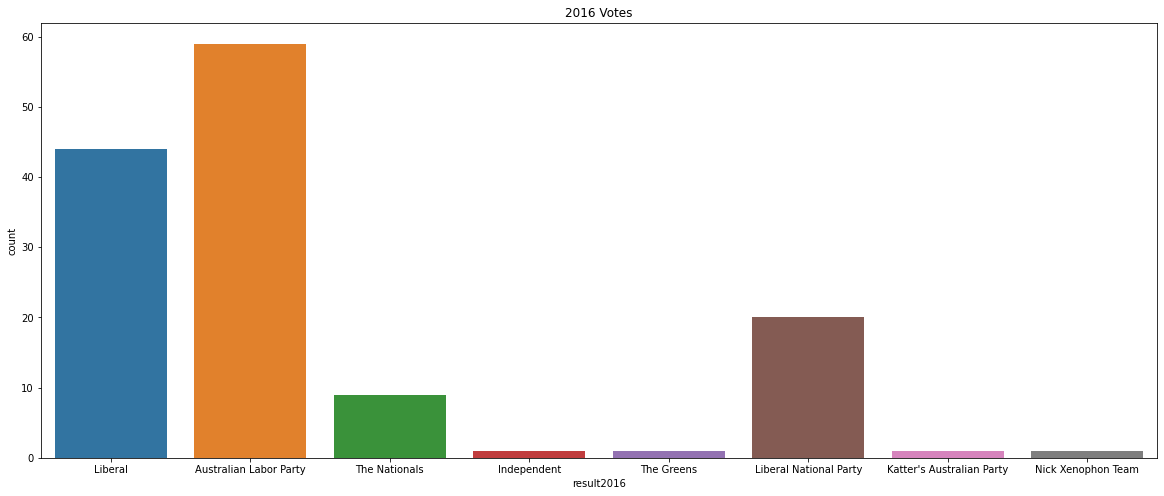

In [103]:
figure, axis = plt.subplots(figsize=(20,8))
sns.countplot(x="result2016", data = dfmaster).set_title("2016 Votes")

The difference is very insignificant so we can continue using the 2016 results when exploring the relationships between social economic factors and electoral voting

Text(0.5, 1.0, '2019 Votes')

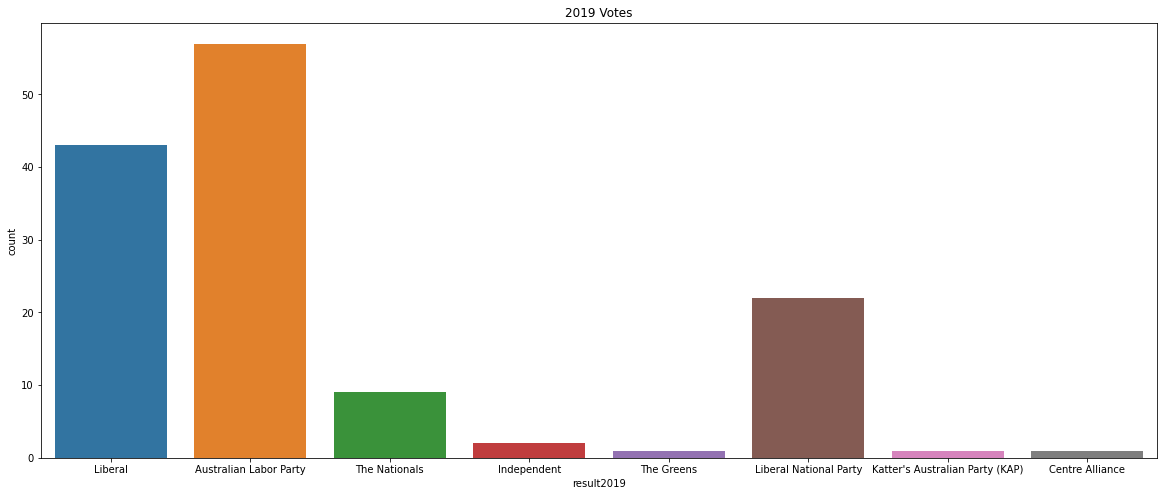

In [104]:
figure, axis = plt.subplots(figsize=(20,8))
sns.countplot(x="result2019", data = dfmaster).set_title("2019 Votes")

Since we don't have enough data and the chances of outliers skewing the interpretation of the bar graphs is high we result to using box plots for other features but just to show the lack of data we compared both the box plots and bar graphs.

<AxesSubplot:xlabel='Personal Median Weekly Incomes ', ylabel='result2016'>

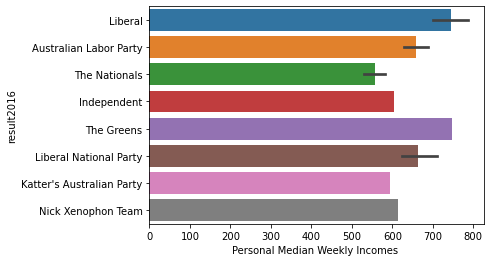

In [105]:
sns.barplot(x="Personal Median Weekly Incomes ", y="result2016", data=dfmaster)

<AxesSubplot:xlabel='result2016', ylabel='Personal Median Weekly Incomes '>

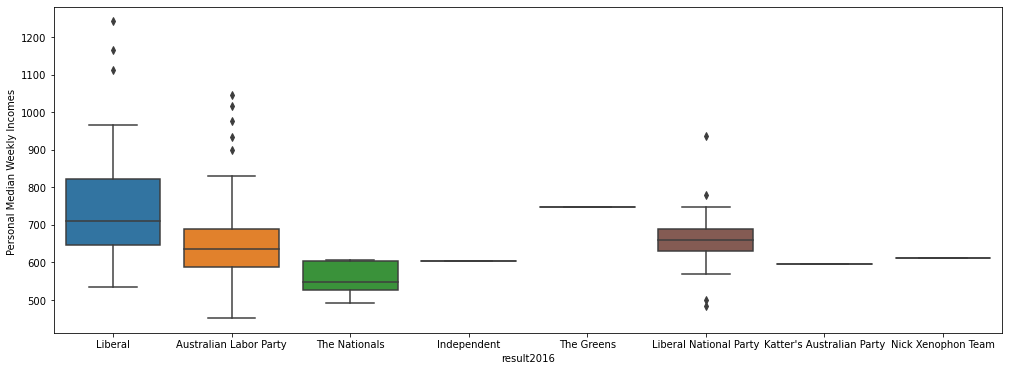

In [106]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["Personal Median Weekly Incomes "], x = dfmaster["result2016"])

<AxesSubplot:xlabel='Family Weekly Median Weekly Incomes ', ylabel='result2016'>

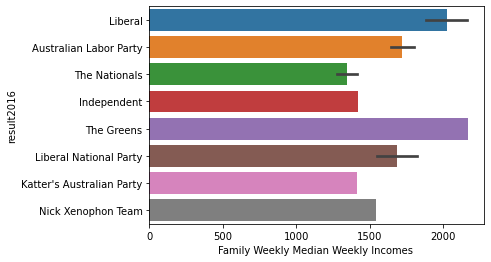

In [107]:
sns.barplot(x="Family Weekly Median Weekly Incomes ", y="result2016", data=dfmaster)

<AxesSubplot:xlabel='result2016', ylabel='Family Weekly Median Weekly Incomes '>

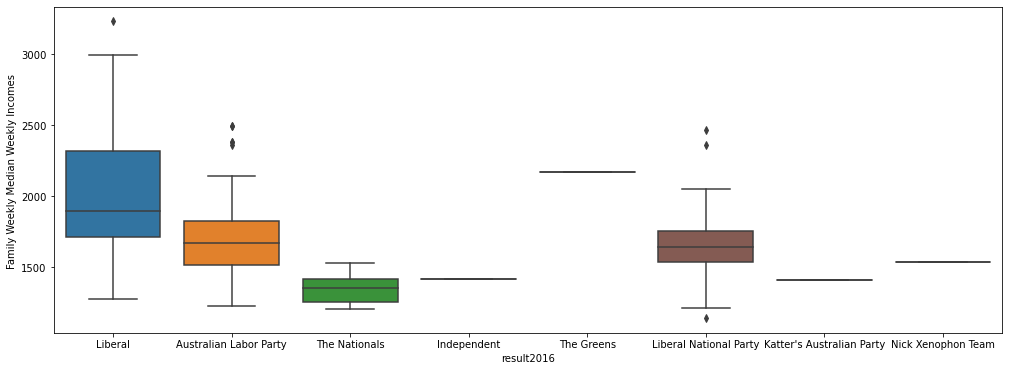

In [108]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["Family Weekly Median Weekly Incomes "], x = dfmaster["result2016"])

<AxesSubplot:xlabel='Household Median Weekly Incomes ', ylabel='result2016'>

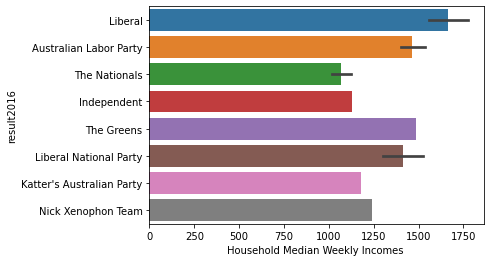

In [109]:
sns.barplot(x="Household Median Weekly Incomes ", y="result2016", data=dfmaster)

<AxesSubplot:xlabel='result2016', ylabel='Household Median Weekly Incomes '>

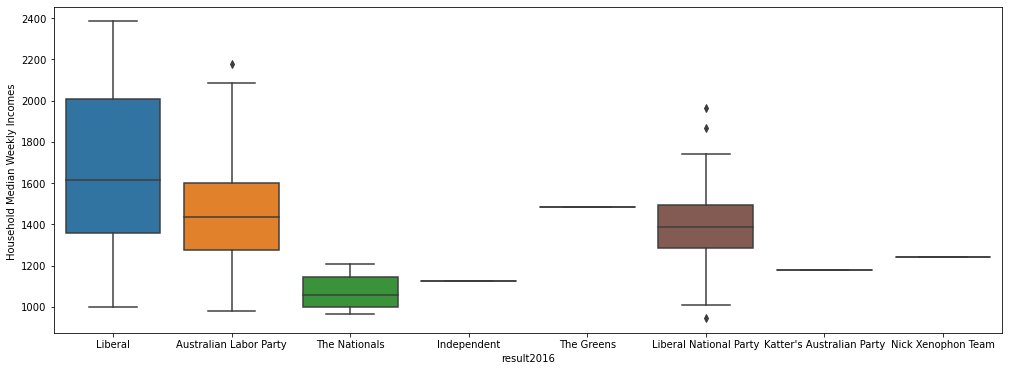

In [110]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["Household Median Weekly Incomes "], x = dfmaster["result2016"])

## Influence of Gender on electoral votes

There is some sort of a trend but not really as political campaigns don't cater towards the gender of voters, yes the winning parties have slightly more female voters but thats just because we have a slightly higher female population. This feature shouldn't really affect the models as whole.  

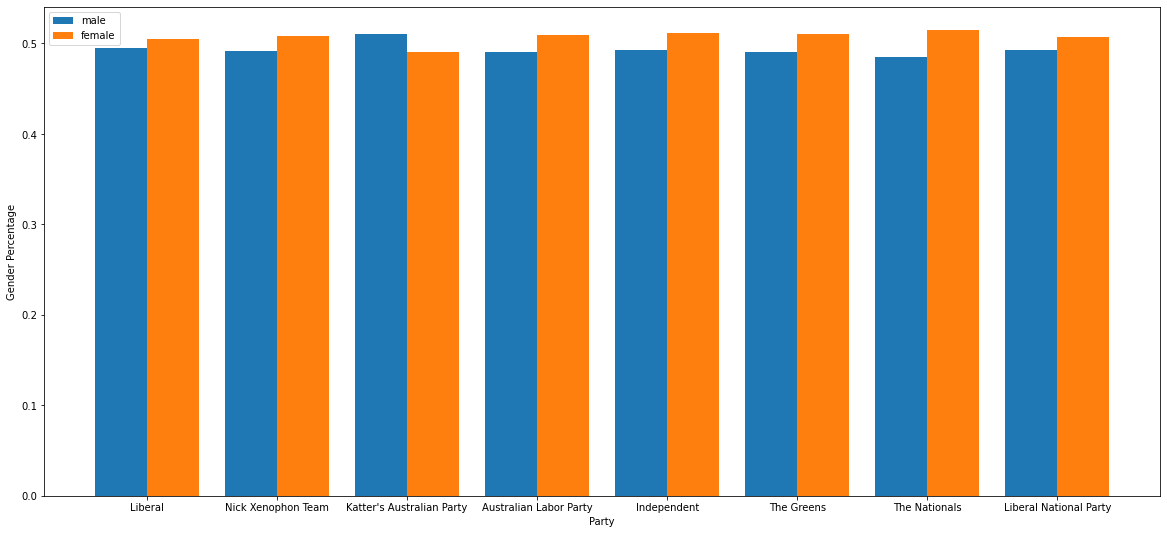

In [111]:
w=0.4
figure, axis = plt.subplots(figsize=(20,9))
x = set(dfmaster['result2016'])
df_groupby = dfmaster.groupby(['result2016']).mean()
male = df_groupby['Male Pop ']
male = male.to_numpy()
female = df_groupby['Female Pop ']
female = female.to_numpy()

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,male,w,label="male")
plt.bar(bar2,female,w,label="female")

plt.xlabel("Party")
plt.ylabel("Gender Percentage")

plt.xticks(bar1+w/2,x)


plt.legend()
plt.show()

## Infulences of Age 

From the graphs alone we can see the 'younger' generation tends towards the Australian Labour Party with a larger range and higher mean. The 'middle' aged people voted slightly more towards the Liberals with a small gap with the Australian Labour Party. The 'older' generation vote towards the nationalists. Age seems to be significant as the higher percentages of whichever generation seems to have a large impact on the electorial outcome. 

In [112]:
#Sub dividing the ages into 3 groups
Age1_sum = dfmaster['0-4 '] + dfmaster['5-9'] + dfmaster['10-14 '] + dfmaster['15-19 '] + dfmaster['20-24 '] + dfmaster['25-29']
dfmaster['0-29'] = Age1_sum
Age2_sum= dfmaster['30-34 '] + dfmaster['35-39 '] + dfmaster['40-44 '] + dfmaster['45-49 '] + dfmaster['50-54 '] + dfmaster['55-59']
dfmaster['30-59'] = Age2_sum
Age3_sum= dfmaster['60-64'] + dfmaster['65-69 '] + dfmaster['70-74 '] + dfmaster['75-79 '] + dfmaster['80-84 '] + dfmaster['85+ ']
dfmaster['60-85'] = Age3_sum

<AxesSubplot:xlabel='result2016', ylabel='0-29'>

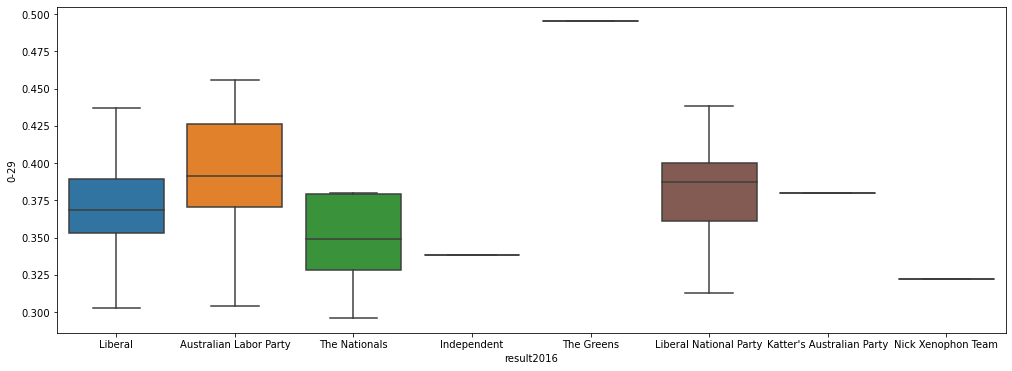

In [113]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["0-29"], x = dfmaster["result2016"])

<AxesSubplot:xlabel='result2016', ylabel='30-59'>

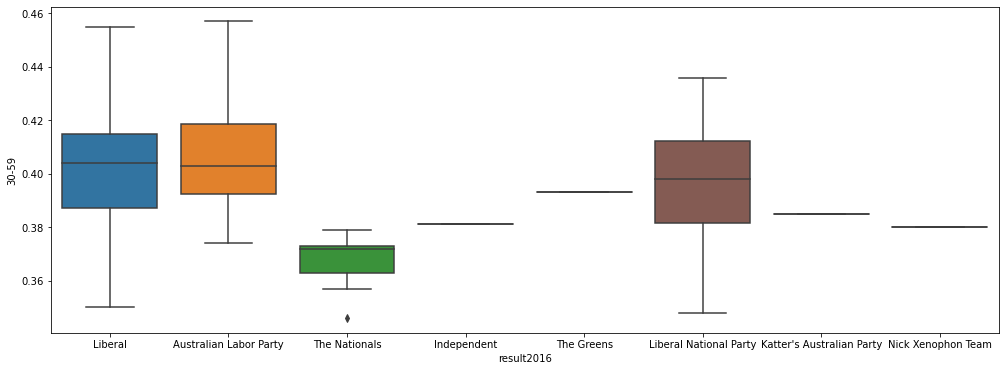

In [114]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["30-59"], x = dfmaster["result2016"])

<AxesSubplot:xlabel='result2016', ylabel='60-85'>

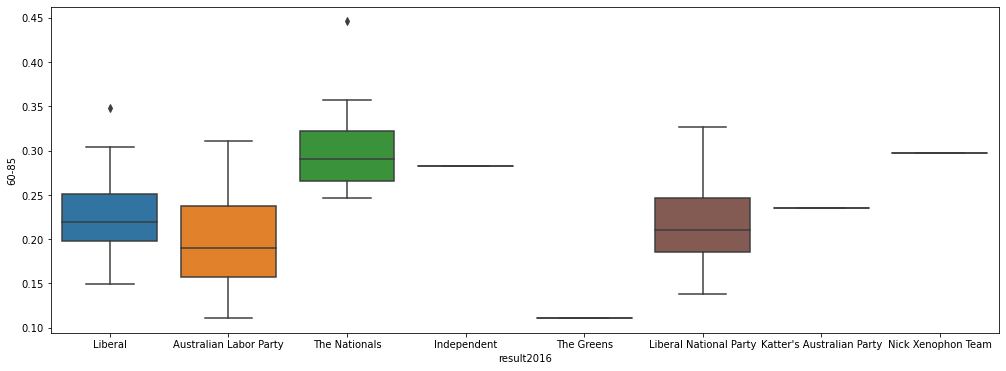

In [115]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["60-85"], x = dfmaster["result2016"])

## Education

- 'Higher' education tends towards the Liberals

- 'High' education tends towards the the Liberals

- 'Standard' education is more evenly distributed tending Australian Labour Party

- 'Low' education is tending more towards The Nationalists

Education seems to also be a key feature in attempting to predict the electoral outcome

<AxesSubplot:xlabel='result2016', ylabel='Highest Education'>

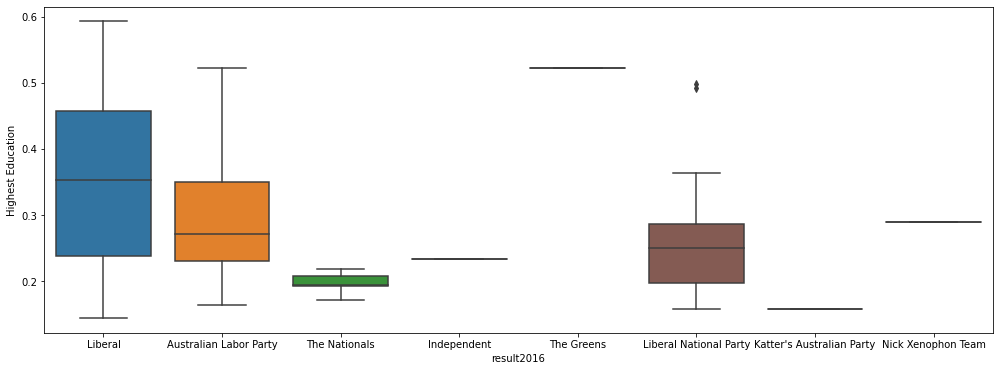

In [116]:
#Place "education" into 4 catagories

HighestEdu_sum = dfmaster['Bachelor Degree'] + dfmaster['Advanced Diploma And Diploma level ']
dfmaster['Highest Education'] = HighestEdu_sum

HighEdu_sum = dfmaster['CertIV '] + dfmaster['CertIII ']
dfmaster['High Education'] = HighEdu_sum

StandardEdu_sum = dfmaster['Year 12 '] + dfmaster['Year 11 '] + dfmaster['Year 10 '] + dfmaster['Year 9 Or Under '] 
dfmaster['Standard Education'] = StandardEdu_sum

LowEdu_sum = dfmaster['None '] + dfmaster['Not Stated Highest Educational Attainment ']
dfmaster['Lowest Education'] = LowEdu_sum

figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["Highest Education"], x = dfmaster["result2016"])

<AxesSubplot:xlabel='result2016', ylabel='High Education'>

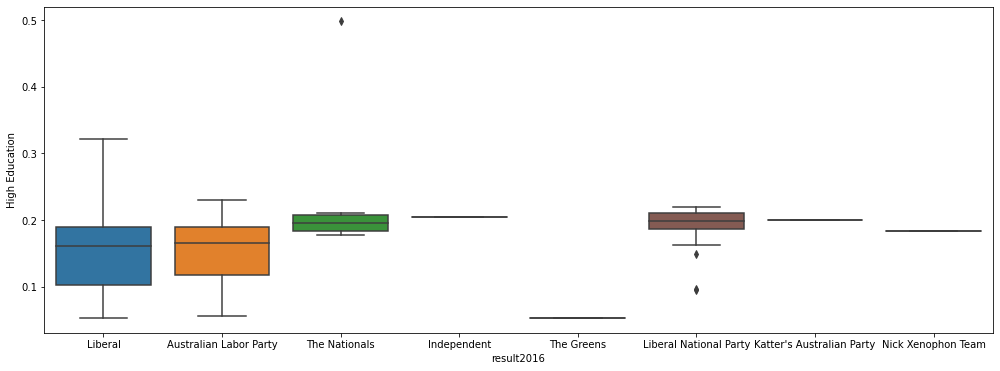

In [117]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["High Education"], x = dfmaster["result2016"])

<AxesSubplot:xlabel='result2016', ylabel='Standard Education'>

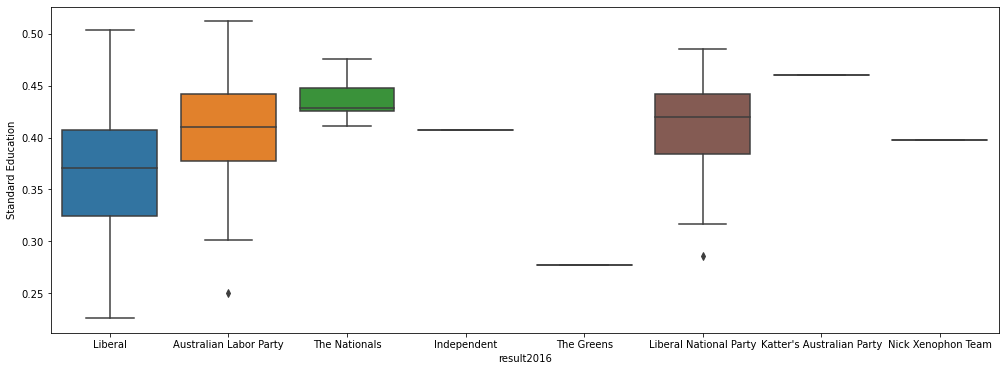

In [118]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["Standard Education"], x = dfmaster["result2016"])

<AxesSubplot:xlabel='result2016', ylabel='Lowest Education'>

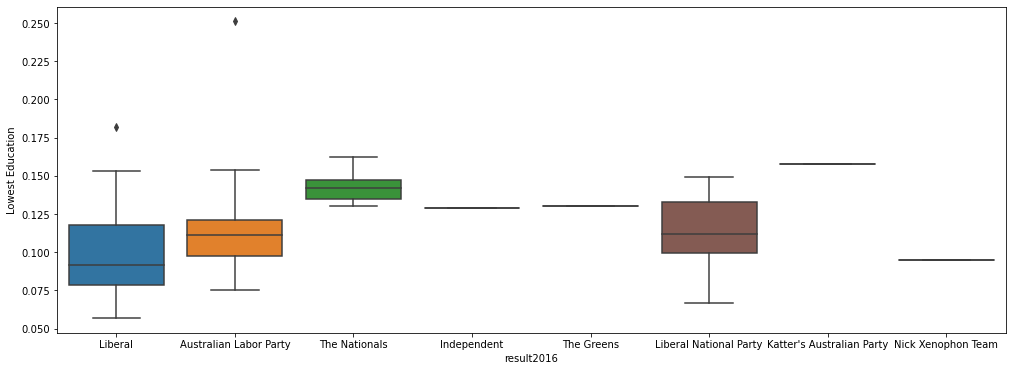

In [119]:
figure, axis = plt.subplots(figsize=(17,6))
sns.boxplot(y = dfmaster["Lowest Education"], x = dfmaster["result2016"])

## K-Means Algorithms

The K-Means algorithm aims to partition N obersvations into K clusters in which each observation belongs to the cluster of the nearest mean. First it initializes K mean value randomly and categorize each items to its closed mean. Also take different mean values which doesn't match to the first initialize mean during iteration of items. so like this we get group of clusters with similarity in items using mean value. We want to see if any trends (clusters) form between features and map the specific cluster labels on the Australian map.

In [120]:
#Droping the String values for the clustering 
unscaled = df.drop(columns = ['Divisions','State'],axis=1)

#Scaling all the features for the KMeans algorithmn so that they are weighted equally
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(unscaled.values)
scaled_values = pd.DataFrame(x_scaled)
mat = scaled_values.values

<function matplotlib.pyplot.show(close=None, block=None)>

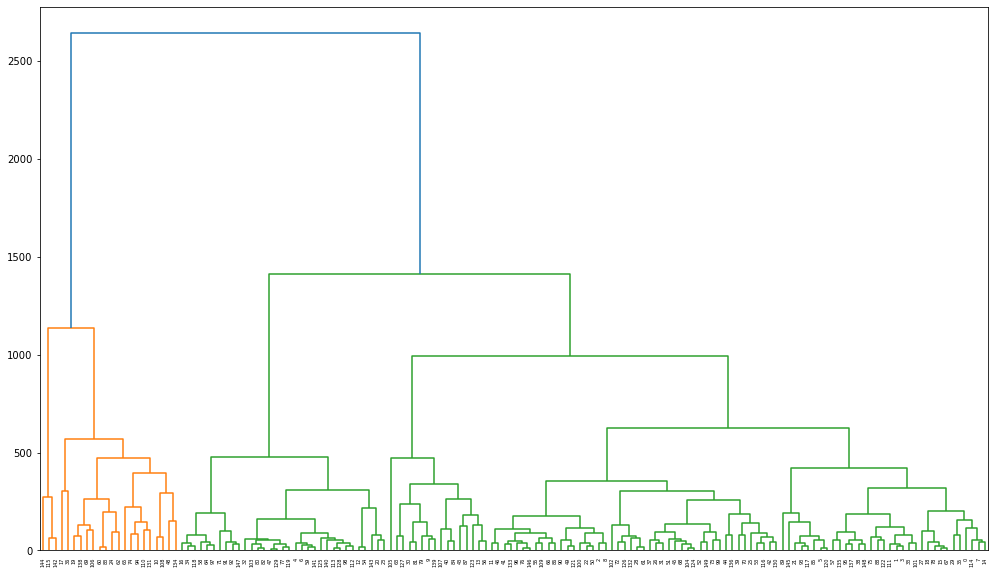

In [121]:
figure, axis = plt.subplots(figsize=(17,10))
df_dendo = df.drop(columns = ['State','Divisions'])
dist = pdist(df_dendo, 'euclidean')
linkage_matrix = linkage(dist, method='complete')
dendrogram(linkage_matrix)
plt.show

In [122]:
#Finding the optimal number of clusters from the Dendogram 
km = KMeans(n_clusters = 12, random_state=142).fit(mat)
labels = km.labels_

#Inserting kmeans labels into the dataframe 
df.insert(0, "kmeans", labels)

In [123]:
aus = aus.rename(columns = {'Elect_div':'Divisions'})
master = pd.merge(aus, df, on="Divisions")
master.head()

,Divisions,Numccds,Actual,Projected,Australians_Over_18,Area_SqKm,Sortname,geometry,kmeans,State,Male Pop,Female Pop,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,Median Age,Preschool,Primary - Government,Primay - Catholic,Primary - Other,Secondary - Government,Secondary - Catholic,Secondary - Other,Technical Or further,University Or tertiary,Other,Not Stated Education,Bachelor Degree,Advanced Diploma And Diploma level,CertIV,CertIII,Year 12,Year 11,Year 10,Year 9 Or Under,None,Not Stated Highest Educational Attainment,Worked Full Time,Worked Part Time,Away From Work,Unemployed,Professionals,Clerical And Administrative Workers,Technicians And Trade Workers,Managers,Community And Personal Service Workers,Sales Workers,Labourers,Machinery Operators And Drivers,Personal Median Weekly Incomes,Family Weekly Median Weekly Incomes,Household Median Weekly Incomes,Owned Private Dwelling Outright,Owned Private Dwelling With A Mortgage,Rented Private Dwelling,Other Tenure Type,Tenure Type Not Stated
0,Lingiari,335,0,0,0,1.352034e+06,Lingiari,"MULTIPOLYGON (((138.00117 -18.62066, 138.00120...",11,NT,0.524,0.476,0.077,0.080,0.073,0.068,0.073,0.085,0.085,0.074,0.071,0.074,0.069,0.059,0.046,0.031,0.018,0.010,0.005,0.003,32,0.046,0.200,0.031,0.026,0.098,0.024,0.035,0.030,0.052,0.014,0.443,0.114,0.056,0.030,0.120,0.104,0.064,0.114,0.122,0.017,0.234,0.642,0.191,0.070,0.098,0.193,0.126,0.155,0.121,0.147,0.058,0.107,0.062,653,1634,1705,0.156,0.253,0.529,0.015,0.047
1,Solomon,180,0,0,0,3.366861e+02,Solomon,"MULTIPOLYGON (((130.81592 -12.40270, 130.81747...",1,NT,0.513,0.487,0.078,0.068,0.059,0.055,0.072,0.104,0.101,0.084,0.074,0.069,0.061,0.054,0.044,0.033,0.019,0.012,0.006,0.005,33,0.046,0.175,0.033,0.037,0.108,0.027,0.036,0.045,0.151,0.027,0.315,0.226,0.087,0.042,0.139,0.150,0.057,0.081,0.052,0.006,0.136,0.694,0.199,0.060,0.047,0.205,0.146,0.159,0.123,0.132,0.075,0.085,0.055,1047,2381,2176,0.152,0.326,0.484,0.005,0.033
2,Bass,208,0,0,0,7.378752e+03,Bass,"MULTIPOLYGON (((146.80811 -41.06256, 146.80825...",7,TAS,0.486,0.514,0.057,0.062,0.059,0.065,0.069,0.058,0.058,0.056,0.062,0.068,0.067,0.068,0.063,0.059,0.047,0.033,0.024,0.025,41,0.026,0.210,0.044,0.033,0.122,0.035,0.039,0.078,0.139,0.018,0.256,0.150,0.071,0.030,0.146,0.126,0.048,0.181,0.103,0.006,0.111,0.520,0.348,0.054,0.078,0.191,0.125,0.137,0.114,0.122,0.110,0.114,0.070,558,1372,1053,0.336,0.322,0.306,0.009,0.026
3,Braddon,226,0,0,0,2.082618e+04,Braddon,"MULTIPOLYGON (((146.41124 -41.25312, 146.41124...",3,TAS,0.487,0.513,0.056,0.063,0.060,0.062,0.053,0.052,0.052,0.052,0.059,0.068,0.072,0.074,0.070,0.067,0.051,0.038,0.026,0.024,44,0.025,0.233,0.063,0.027,0.146,0.045,0.019,0.079,0.060,0.017,0.287,0.095,0.068,0.029,0.172,0.094,0.051,0.212,0.131,0.003,0.117,0.520,0.342,0.060,0.078,0.136,0.114,0.150,0.120,0.121,0.102,0.153,0.087,523,1276,982,0.364,0.314,0.285,0.007,0.030
4,Denison,197,0,0,0,2.887177e+02,Denison,"MULTIPOLYGON (((147.36050 -42.93169, 147.36049...",0,TAS,0.486,0.514,0.052,0.057,0.055,0.061,0.075,0.074,0.067,0.060,0.064,0.066,0.066,0.068,0.061,0.054,0.040,0.031,0.023,0.026,39,0.024,0.169,0.050,0.031,0.096,0.041,0.046,0.068,0.232,0.022,0.220,0.268,0.075,0.027,0.111,0.150,0.040,0.123,0.079,0.006,0.097,0.525,0.355,0.050,0.071,0.270,0.139,0.128,0.117,0.113,0.092,0.084,0.040,638,1622,1224,0.318,0.311,0.336,0.009,0.026


Text(0.5, 1.0, 'Australian Map, KMeans Clustered by Socioeconomic Factors')

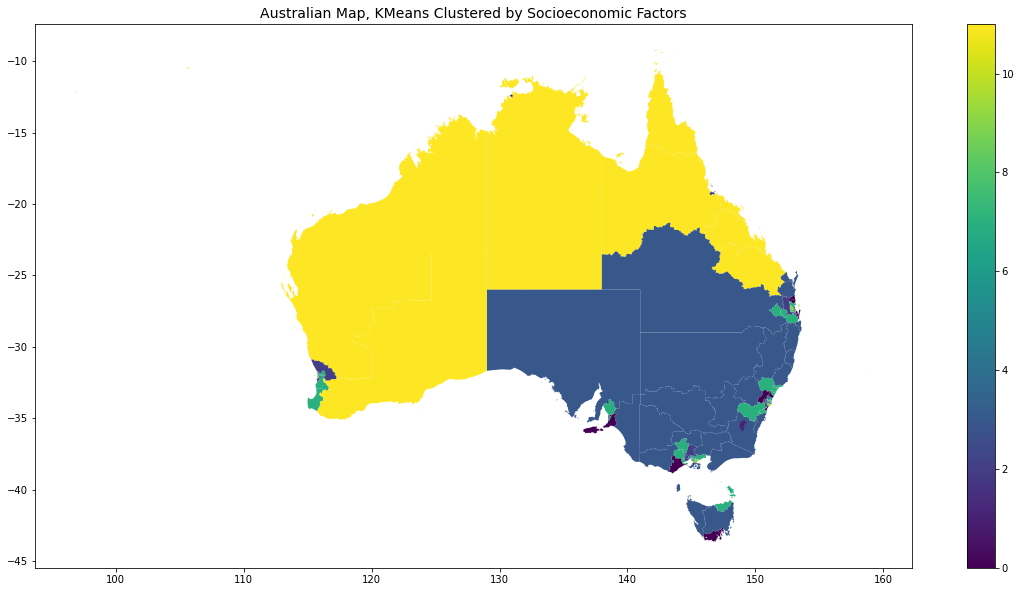

In [124]:
#Plotting Australian Map, colour coded by Kmeans clusters
master.plot(column='kmeans', figsize=(20,10), legend=True)
plt.title("Australian Map, KMeans Clustered by Socioeconomic Factors", fontsize=14)

# Importing Data for Classification

When importing the two electoral datasets for both 2016 and 2019 there are distinct differences in terms of federal divisions which reduces the rows in the dataset which were uncommon.

In [125]:
#imporint result datasets 
results2016 = pd.read_csv("result2016.csv", sep=",", header=None)
results2016 = results2016.rename(columns={0: "Divisions", 1: "Party"})

results2019 = pd.read_csv("2019Result.csv", sep=",", header=None)
results2019 = results2019.rename(columns={0: "Divisions", 1: "Party"})

In [126]:
#there are 6 different states in 2019 than in 2016 
master = pd.merge(master, results2016, on="Divisions")
master = pd.merge(master, results2019, on="Divisions")
master.shape

(136, 74)

In [127]:
master = master.rename(columns={"Party_x": "result2016", "Party_y": "result2019"})
master.head()

,Divisions,Numccds,Actual,Projected,Australians_Over_18,Area_SqKm,Sortname,geometry,kmeans,State,Male Pop,Female Pop,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,Median Age,Preschool,Primary - Government,Primay - Catholic,Primary - Other,Secondary - Government,Secondary - Catholic,Secondary - Other,Technical Or further,University Or tertiary,Other,Not Stated Education,Bachelor Degree,Advanced Diploma And Diploma level,CertIV,CertIII,Year 12,Year 11,Year 10,Year 9 Or Under,None,Not Stated Highest Educational Attainment,Worked Full Time,Worked Part Time,Away From Work,Unemployed,Professionals,Clerical And Administrative Workers,Technicians And Trade Workers,Managers,Community And Personal Service Workers,Sales Workers,Labourers,Machinery Operators And Drivers,Personal Median Weekly Incomes,Family Weekly Median Weekly Incomes,Household Median Weekly Incomes,Owned Private Dwelling Outright,Owned Private Dwelling With A Mortgage,Rented Private Dwelling,Other Tenure Type,Tenure Type Not Stated,result2016,result2019
0,Lingiari,335,0,0,0,1.352034e+06,Lingiari,"MULTIPOLYGON (((138.00117 -18.62066, 138.00120...",11,NT,0.524,0.476,0.077,0.080,0.073,0.068,0.073,0.085,0.085,0.074,0.071,0.074,0.069,0.059,0.046,0.031,0.018,0.010,0.005,0.003,32,0.046,0.200,0.031,0.026,0.098,0.024,0.035,0.030,0.052,0.014,0.443,0.114,0.056,0.030,0.120,0.104,0.064,0.114,0.122,0.017,0.234,0.642,0.191,0.070,0.098,0.193,0.126,0.155,0.121,0.147,0.058,0.107,0.062,653,1634,1705,0.156,0.253,0.529,0.015,0.047,Australian Labor Party,Australian Labor Party
1,Solomon,180,0,0,0,3.366861e+02,Solomon,"MULTIPOLYGON (((130.81592 -12.40270, 130.81747...",1,NT,0.513,0.487,0.078,0.068,0.059,0.055,0.072,0.104,0.101,0.084,0.074,0.069,0.061,0.054,0.044,0.033,0.019,0.012,0.006,0.005,33,0.046,0.175,0.033,0.037,0.108,0.027,0.036,0.045,0.151,0.027,0.315,0.226,0.087,0.042,0.139,0.150,0.057,0.081,0.052,0.006,0.136,0.694,0.199,0.060,0.047,0.205,0.146,0.159,0.123,0.132,0.075,0.085,0.055,1047,2381,2176,0.152,0.326,0.484,0.005,0.033,Australian Labor Party,Australian Labor Party
2,Bass,208,0,0,0,7.378752e+03,Bass,"MULTIPOLYGON (((146.80811 -41.06256, 146.80825...",7,TAS,0.486,0.514,0.057,0.062,0.059,0.065,0.069,0.058,0.058,0.056,0.062,0.068,0.067,0.068,0.063,0.059,0.047,0.033,0.024,0.025,41,0.026,0.210,0.044,0.033,0.122,0.035,0.039,0.078,0.139,0.018,0.256,0.150,0.071,0.030,0.146,0.126,0.048,0.181,0.103,0.006,0.111,0.520,0.348,0.054,0.078,0.191,0.125,0.137,0.114,0.122,0.110,0.114,0.070,558,1372,1053,0.336,0.322,0.306,0.009,0.026,Australian Labor Party,Liberal
3,Braddon,226,0,0,0,2.082618e+04,Braddon,"MULTIPOLYGON (((146.41124 -41.25312, 146.41124...",3,TAS,0.487,0.513,0.056,0.063,0.060,0.062,0.053,0.052,0.052,0.052,0.059,0.068,0.072,0.074,0.070,0.067,0.051,0.038,0.026,0.024,44,0.025,0.233,0.063,0.027,0.146,0.045,0.019,0.079,0.060,0.017,0.287,0.095,0.068,0.029,0.172,0.094,0.051,0.212,0.131,0.003,0.117,0.520,0.342,0.060,0.078,0.136,0.114,0.150,0.120,0.121,0.102,0.153,0.087,523,1276,982,0.364,0.314,0.285,0.007,0.030,Australian Labor Party,Liberal
4,Franklin,179,0,0,0,6.514208e+03,Franklin,"MULTIPOLYGON (((146.60549 -42.95920, 146.64551...",0,TAS,0.487,0.513,0.060,0.065,0.061,0.059,0.049,0.051,0.059,0.059,0.065,0.069,0.068,0.074,0.068,0.065,0.047,0.035,0.023,0.023,43,0.028,0.213,0.074,0.040,0.120,0.061,0.037,0.069,0.114,0.021,0.224,0.195,0.090,0.031,0.147,0.127,0.047,0.154,0.081,0.002,0.095,0.536,0.357,0.054,0.053,0.211,0.155,0.141,0.124,0.123,0.095,0.093,0.042,642,1572,1265,0.372,0.383,0.214,0.009,0.023,Australian Labor Party,Australian Labor Party


# Preprocessing for Classification

In [128]:
le = preprocessing.LabelEncoder()
#formating the string values of the political parties to numbers by labeling them
master['result2016'] = le.fit_transform(master.result2016.values)
master['result2019'] = le.fit_transform(master.result2019.values)

cv_master_data = master.drop(columns=['Divisions','Numccds', 'Actual', 'Projected', 'Australians_Over_18',
       'Area_SqKm', 'Sortname', 'geometry', 'kmeans', 'State','result2016',
       'result2019'])

cv_master_data = cv_master_data.to_numpy()
cv_master_target = master['result2019'].to_numpy()


In [129]:
master.shape

(136, 74)

# Spliting the data in Train and Test Data 

In [130]:
#Setting up X and y's for our Data set 
X_master = master.drop(columns=['Divisions','Numccds', 'Actual', 'Projected', 'Australians_Over_18',
       'Area_SqKm', 'Sortname', 'geometry', 'kmeans', 'State','result2016',
       'result2019'])
y_master= master['result2019']

X_train,X_test,y_train,y_test = train_test_split(X_master,y_master,test_size=.3,random_state=42)

# MODEL BUILDING 

## Using K-Nearest Neighbour Classifier and Cross Validation

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. It calculate the 'how difference' the instance to the target class and classify based on which is the nearest class. We use Cross Validation to manually evaluate this model based on differing 'n' Neighbours. 

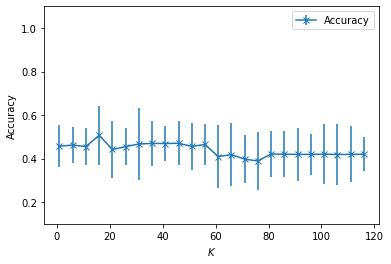

In [131]:
cv_scores = []
cv_scores_std = []
k_range = range(1, 120, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, cv_master_data, cv_master_target, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())
    
# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()    


## GridSearchCV

This works the same way but uses a more automated process to find the best 'K' value.

In [133]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'n_neighbors': range(1, 120, 5)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
gs_knn.fit(cv_master_data, cv_master_target)

print('Best K value: ', gs_knn.best_params_['n_neighbors'])
print('The accuracy: %.4f\n' % gs_knn.best_score_)

Best K value:  16
The accuracy: 0.4830



# KNN Classifier 

In [134]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train, y_train) 
testpredictions =knn.predict(X_test)
prediction_knn_all  = knn.predict(X_master)
print("Test set Accuracy is" ,np.mean(testpredictions==y_test))

Test set Accuracy is 0.5609756097560976


## Decision Tree Classifier + Feature Importances

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. 

Decision tree classifier predicted seats in test data with accuracy 0.6341463414634146


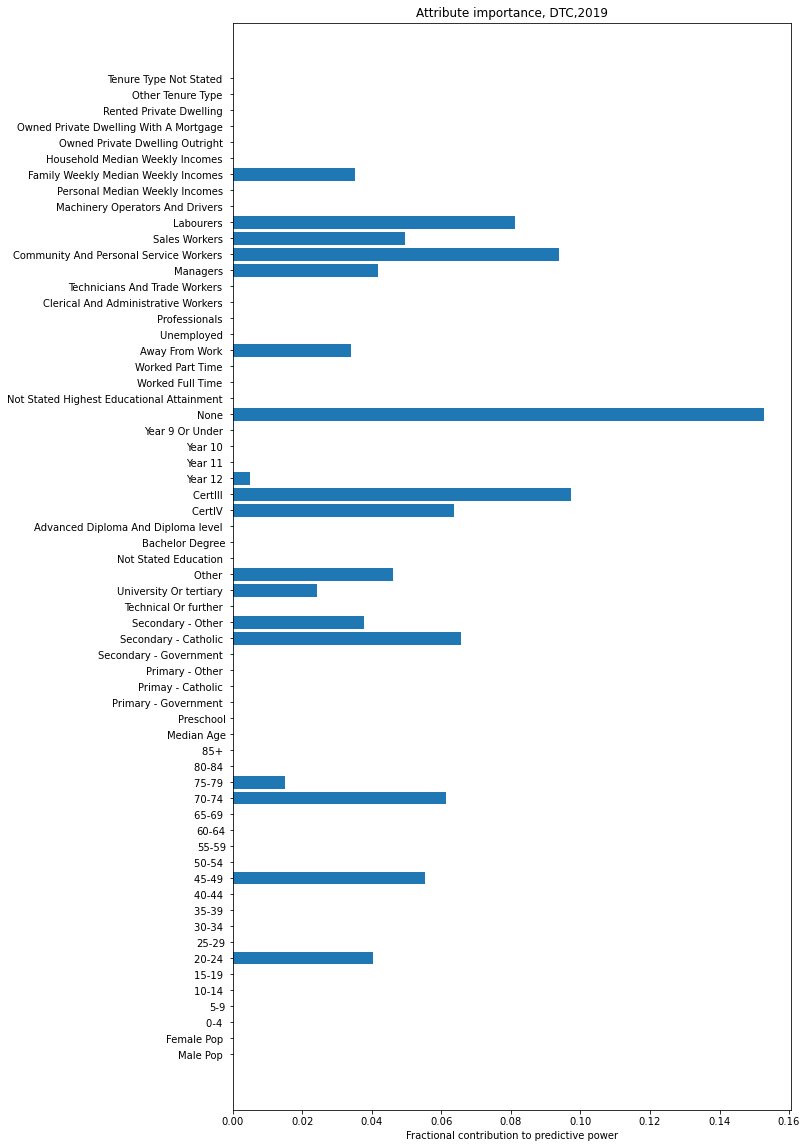

In [135]:
#Decision tree classifier
DTC = tree.DecisionTreeClassifier()
DTC = DTC.fit(X_train, y_train)
testpredictions = DTC.predict(X_test) 
testprediction_all = DTC.predict(X_master)
print("Decision tree classifier predicted seats in test data with accuracy " + str(accuracy_score(testpredictions,y_test)))

plt.figure(figsize=(10, 20))
top_row = X_train.columns
plt.barh(top_row, DTC.feature_importances_)
plt.title("Attribute importance, DTC,2019")
plt.xlabel("Fractional contribution to predictive power")
plt.show()

# DTC_results = regresults_dict(testpredictions,'Decision Tree')

## Gaussian Naive Bayes Classifier 

In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. We train the model based on the occurence of a certain feature in the prior observation and classify based on if that feature appears in the posterior observation.

In [136]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
testpredictions=clf.predict(X_test)
print("Accuracy on test set ",np.mean(testpredictions==y_test))

Accuracy on test set  0.5853658536585366


## Multinomial Naive Bayes

Multinomial Naive Bayes is a classification model that is most suitable for discrete features.

In [137]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
testpredictions=clf.predict(X_test)
print("Accuracy on test set ",np.mean(testpredictions==y_test))
# MNB_results = regresults_dict(testpredictions,'Multi NB')

Accuracy on test set  0.4146341463414634


## Feature Selection to increase the accuracy score of our model

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/myenv/li

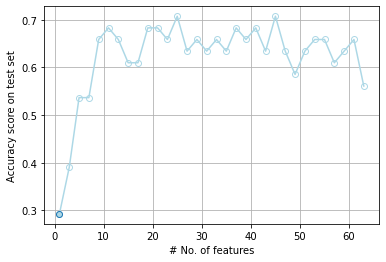

In [138]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = tree.DecisionTreeClassifier()
acc_scores = []
rfe_range = range(1, 64, 2)
for i in rfe_range:
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()
    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(rfe_range, acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

From the above graph we can see that the best number of features to select is 41

In [139]:
DTC_model = tree.DecisionTreeClassifier()
rfe = RFE(estimator=DTC_model, n_features_to_select=45, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=45)

In [140]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

feature_rankings = pd.DataFrame(
    {'features': X_train.columns,
     'ranking': rfe.ranking_})

feature_rankings=feature_rankings.sort_values(by=['ranking'])
feature_rankings.head()

accuracy score on test set:  0.6097560975609756


,features,ranking
30,Other,1
25,Secondary - Government,1
51,Sales Workers,1
27,Secondary - Other,1
28,Technical Or further,1


we can see that the University or education factor is the most important variables with second being the profession of the people that effects the political party's election the most.

We can see that our model best performs with 45 features, so we will remove the features that our model is not using and test the accuraccy score 

# After Recursive Feature Elemination 

Remove the unnessary columns in the dataset to improve the model accuracy scores.

In [142]:
X_Master_RFC = X_master.drop(columns=['Not Stated Education ','Secondary - Government ','Other ','Owned Private Dwelling With A Mortgage ','Rented Private Dwelling ','Other Tenure Type ','Year 12 ','Advanced Diploma And Diploma level ','CertIII ','CertIV ','Tenure Type Not Stated ','Female Pop ','Male Pop '])
y_master_RFC = y_master

#spliting into training and testing datas 
X_train,X_test,y_train,y_test = train_test_split(X_Master_RFC,y_master_RFC,test_size=.3,random_state=42)

# Final Evaluation after RFE

After determining which features are of most significance we will go through a wide range of different accuracy tests to see if there was any improvements to the models.

## KNN 

In [153]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train, y_train) 
testpredictions =knn.predict(X_test)
prediction_knn_all  = knn.predict(X_Master_RFC)
print("Test set Accuracy is" ,np.mean(testpredictions==y_test))
KNN_results = results_dict(testpredictions,'KNN')

Test set Accuracy is 0.5609756097560976


/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Classifier 

Based off the decision tree classifier algorithm we can see the features that are most importance based off the graph below.

Decision tree classifier predicted seats in test data with accuracy 0.43902439024390244


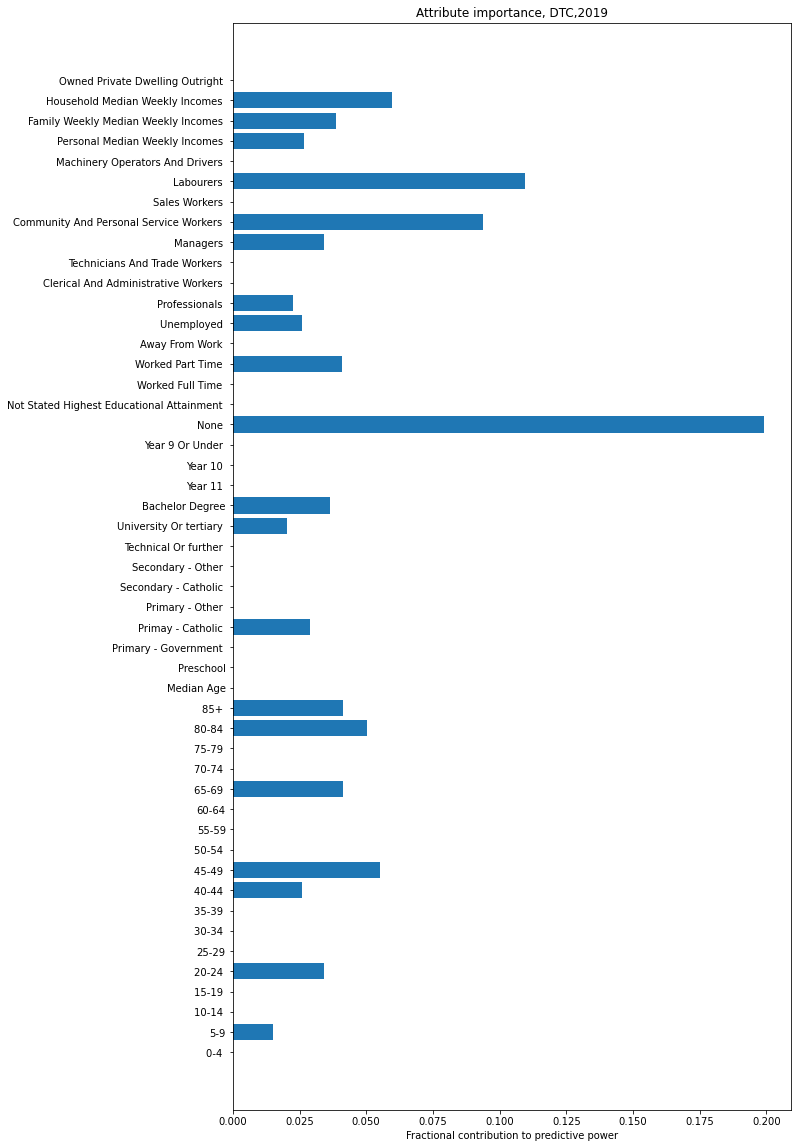

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
#Decision tree classifier
DTC = tree.DecisionTreeClassifier()
DTC = DTC.fit(X_train, y_train)
testpredictions = DTC.predict(X_test) 
testprediction_all = DTC.predict(X_Master_RFC)
print("Decision tree classifier predicted seats in test data with accuracy " + str(accuracy_score(testpredictions,y_test)))

plt.figure(figsize=(10, 20))
top_row = X_train.columns
plt.barh(top_row, DTC.feature_importances_)
plt.title("Attribute importance, DTC,2019")
plt.xlabel("Fractional contribution to predictive power")
plt.show()

DTC_results = results_dict(testpredictions,'Decision Tree')

## NAIVE BAIYES 

In [155]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
testpredictions=clf.predict(X_test)
print("Accuracy on test set ",np.mean(testpredictions==y_test))

GNB_results = results_dict(testpredictions,'GNB')

Accuracy on test set  0.5609756097560976


/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MULTI NOMIAL NB 

In [156]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
testpredictions=clf.predict(X_test)
print("Accuracy on test set ",np.mean(testpredictions==y_test))
MNB_results = results_dict(testpredictions,'Multi NB')

Accuracy on test set  0.3902439024390244


/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plotting Classification Map and Result Map

The following maps of Australia, based off the 2016 social economic factors, attempts to predict the results of the 2019 election where each number signify's a political party that participated in the election.

In [147]:
#Inserting the labels back into the training and test data dataframes
master.insert(10,"DecisionTree",testprediction_all)
master.insert(11,"KNN",prediction_knn_all)

Text(0.5, 1.0, '2019 Election Result')

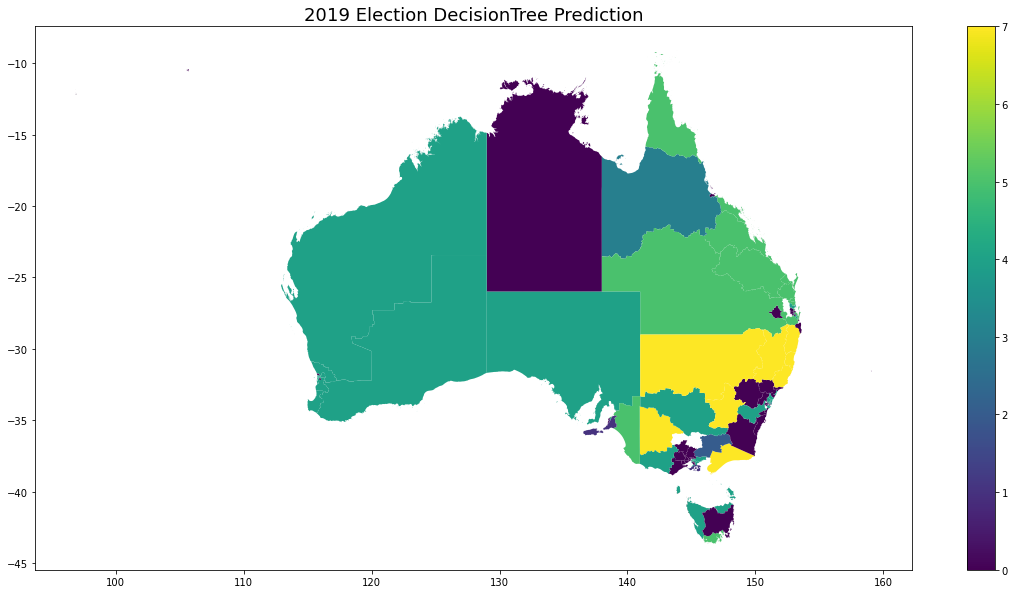

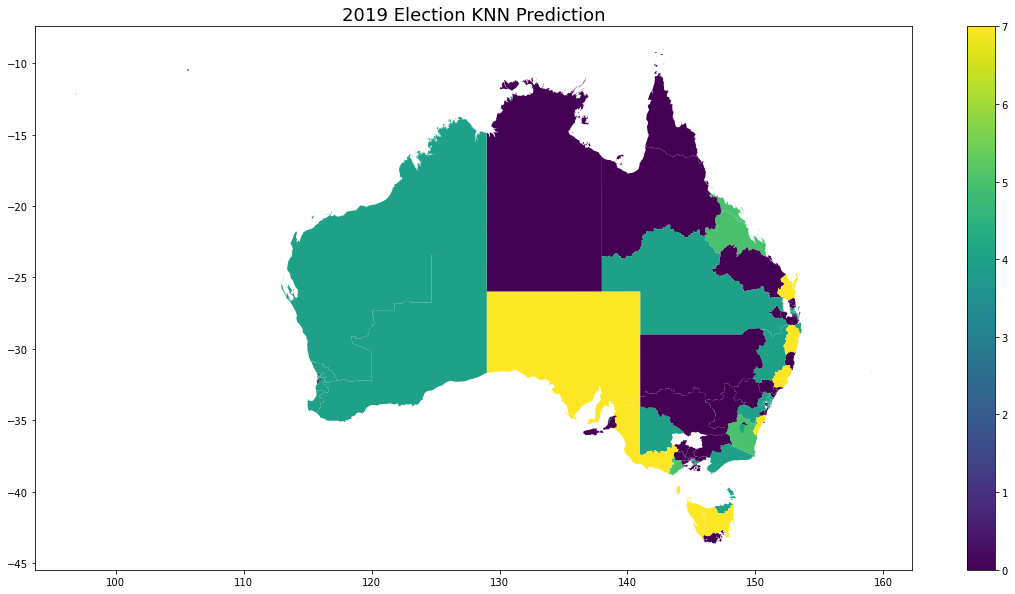

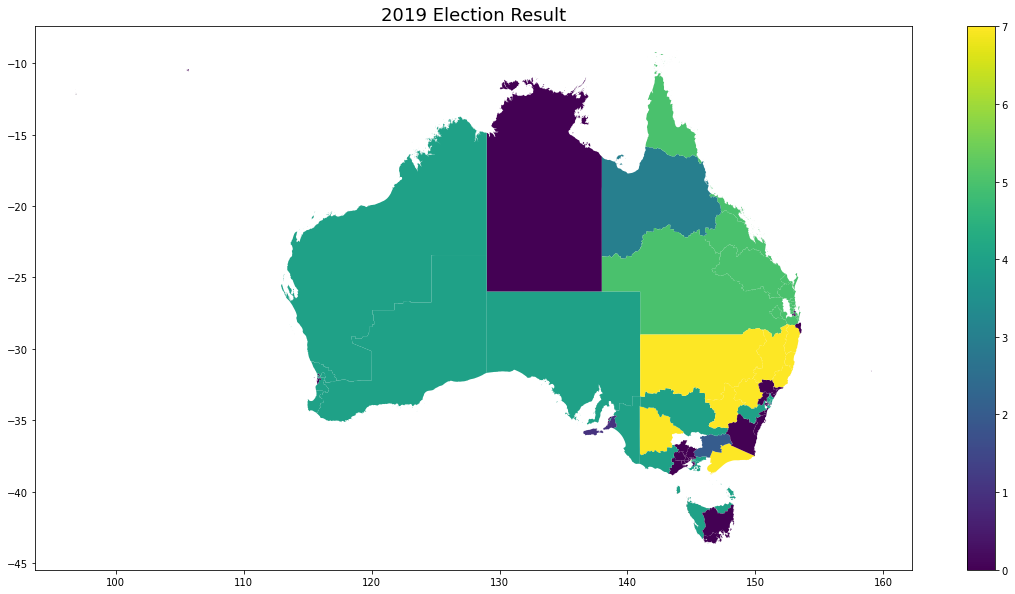

In [148]:
# Plotting the Decision Tree Classifications, KNN and the Actual Results
master.plot(column='DecisionTree', figsize=(20,10), legend=True)
plt.title( "2019 Election DecisionTree Prediction", fontsize=18)

master.plot(column='KNN', figsize=(20,10), legend=True)
plt.title( "2019 Election KNN Prediction", fontsize=18)

master.plot(column='result2019', figsize=(20,10),legend=True)
plt.title( "2019 Election Result", fontsize=18)

# Model Evaluation

In [152]:
def results_dict(prediction,string):
    foo = dict()
    foo['accuracy'] = accuracy_score(y_test,prediction)
    foo['f1'] = f1_score(y_test,prediction,average='macro')
    foo['recall'] = recall_score(y_test,prediction,average='macro')
    foo['precision'] = precision_score(y_test,prediction,average='macro')
    foo['type'] = string
    return foo 

In [157]:
KNN_frame = pd.DataFrame([KNN_results])
DTC_frame = pd.DataFrame([DTC_results])
GNB_frame = pd.DataFrame([GNB_results])
Multi_NB_frame = pd.DataFrame([MNB_results])

classification_performance = pd.concat([KNN_frame,DTC_frame,GNB_frame,Multi_NB_frame],ignore_index=True)

In [158]:
classification_performance

,accuracy,f1,recall,precision,type
0,0.560976,0.309364,0.306926,0.385926,KNN
1,0.439024,0.293256,0.266474,0.354040,Decision Tree
2,0.560976,0.401895,0.443579,0.385556,GNB
3,0.390244,0.237920,0.282251,0.241900,Multi NB


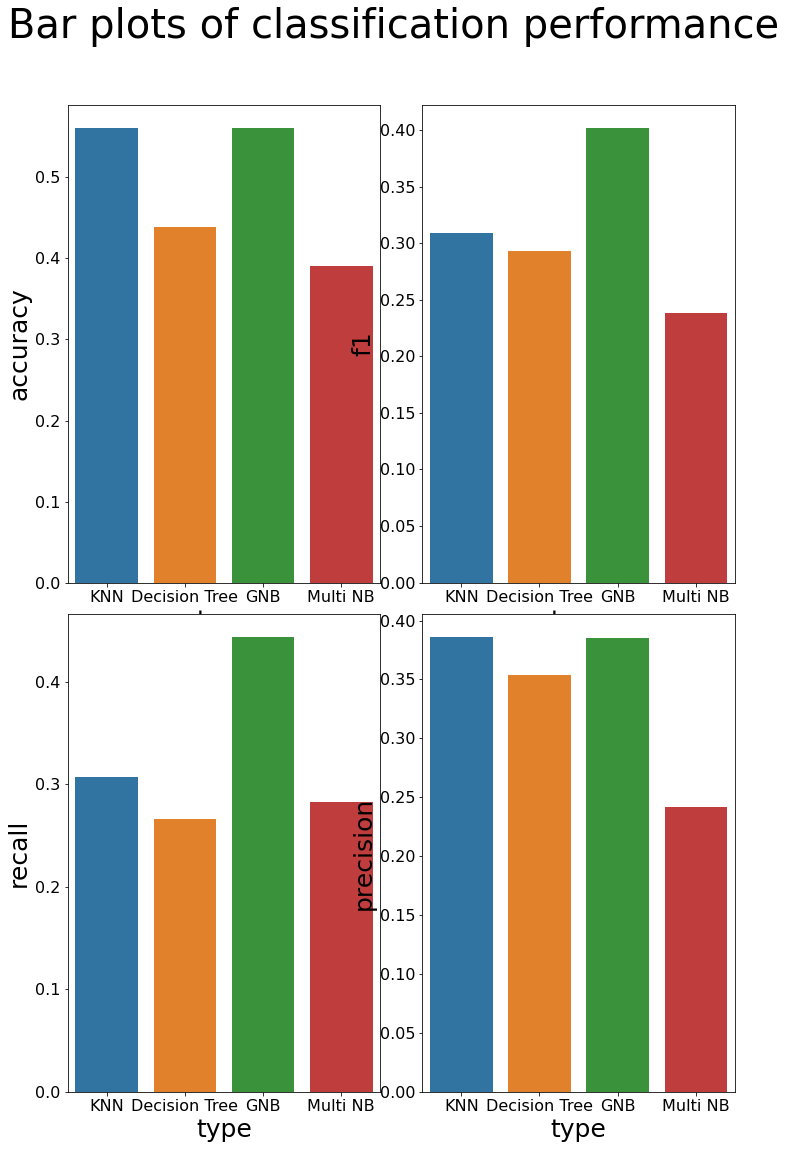

In [159]:
cols = classification_performance.columns[:4]
fig,axes = plt.subplots(2, 2, sharex=False, sharey=False,figsize = (10,15))
plt.suptitle('Bar plots of classification performance', size='40',y=1.03)
plt.tight_layout()
for i, ax in enumerate(axes.flat):
    sns.barplot(x='type',y=cols[i],data=classification_performance,ax=ax)
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
    ax.tick_params(labelsize=16)

array([[ 8,  0,  5,  0,  0],
       [10,  5,  1,  1,  0],
       [ 4,  1,  3,  0,  2],
       [ 0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0]])

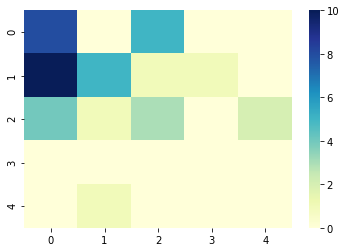

In [160]:
CM_DTC = confusion_matrix(testpredictions, y_test)
sns.heatmap(CM_DTC, cmap="YlGnBu")
CM_DTC

The confusion matrix provide information what are the false positive and false negative the model is making. As seen above, The model tends to predict the majority(not match) class right but can hardly classified match.

# Conclusion and notes for further improvement

We can conclude that social economic factors do have some influence over the electoral outcome such as Age, Income, Profession and Education where the most significant factors were underlying within the education sector.

There were alot of differing factors that affected the performance of our model such as:

- Political Rules (formation of coalitions)

- Independantly sourced datasets (human errors)

- More sophisticated statistical techniques

- Not enough datasets (for example: the Greens weren't 'popular' so there wasn't a large range of values for each feature, hence under fitting occurs) 

A major flaw with this analysis is the pretense of knowing the social economic factors rather than predicting it, so if we were to use the 2016 social economic dataset to predict 2022 federal elections it would be biased towards the elected political party of that time period. 

Based off the datasets given from the AEC website we conclude that the The Australian Labour Party will win future elections using the 2016 social econimic factors but the Liberal and Liberal National Party formed a coalition resulting in the Liberals winning in both 2016 and 2019 which skewed our analysis, further rules and coalitions hinder our model's performance. 